<h1>Testing the aperture generation for PASTIS</h1>

Generating the correct aperture for the telescope you want to apply PASTIS on and finding the non-redundant pairs of the aperture is the first step for the application of the PASTIS contrast estimation. This notebook provides a succession of steps to check whether that worked correctly and ckecks the script "**aperture_definition.py**" in the PASTIS repo.

In [2]:
import os
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

# Path to all the outputs from "aperture_definition.py".
dir = '/Users/ilaginja/Documents/data_from_repos/pastis_data/segmentation'
# Change into that directory
os.chdir(dir)

Open up the file "JWST_aperture.pdf" when it gets created, so that we can do cross-checks. For 

The first testing output is "seg_position.txt", which gives you all the x- and y-coordinates of all segments with respect to the center of the aperture. Run the cell below and see whether this matches the aperture (please open the PDF file manually, I didn't have the time to figure out how to include PDF images in a Jupyter notebook.) What you're looking at are the center coordinates of all segments.

In [3]:
seg = np.loadtxt('seg_position.txt')
print('Segment x and y positions in meters:')
print(seg)

Segment x and y positions in meters:
[[ 0.    1.33]
 [ 1.15  0.67]
 [ 1.15 -0.66]
 [ 0.   -1.33]
 [-1.15 -0.67]
 [-1.15  0.66]
 [ 0.    2.66]
 [ 1.15  2.  ]
 [ 2.3   1.33]
 [ 2.3   0.  ]
 [ 2.3  -1.33]
 [ 1.15 -2.  ]
 [ 0.   -2.66]
 [-1.15 -2.  ]
 [-2.3  -1.33]
 [-2.3  -0.  ]
 [-2.3   1.33]
 [-1.15  1.99]]


Next are the distances between all segments instead of the individual positions. Load both the x- and the y-coordinate distances and display them.

I just realized that if I do that, I can't get the image values by hovering over them. We need that though, so go for it in an ipython session or something. Then do the same as above, figure out by comparison with the aperture whether the values make sense. One of the things you can check is whether the diagonals are zero, because the distance from a segment to itself will always be zero.

The "extent" keyword fixes the segment numbering in the images, which is now the same like in the numbered pupil.

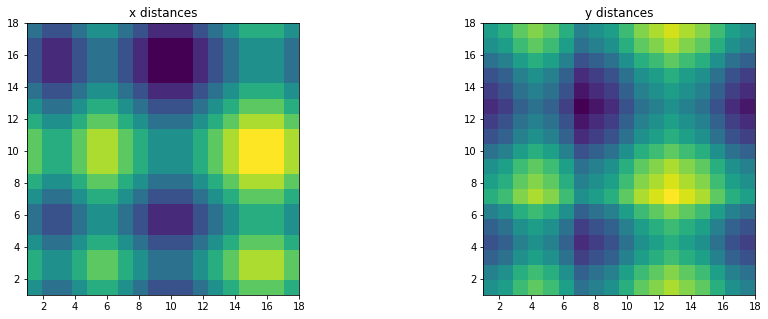

In [8]:
vx = np.loadtxt('vec_list_x.txt')
vy = np.loadtxt('vec_list_y.txt')

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.imshow(vx, origin='lower', extent=[1, 18, 1, 18], interpolation=None)
plt.title('x distances')

plt.subplot(1, 2, 2)
plt.imshow(vy, origin='lower', extent=[1, 18, 1, 18], interpolation=None)
plt.title('y distances')

plt.show()

Next thing is "vec_flat.txt". Load and print, I don't think there's much to check here actually.

In [16]:
flat = np.loadtxt('vec_flat.txt')
print(flat)

[[  0.00000000e+00   0.00000000e+00]
 [ -1.15181379e+00   6.65000000e-01]
 [ -1.15181379e+00   1.99500000e+00]
 [ -1.62878024e-16   2.66000000e+00]
 [  1.15181379e+00   1.99500000e+00]
 [  1.15181379e+00   6.65000000e-01]
 [  0.00000000e+00  -1.33000000e+00]
 [ -1.15181379e+00  -6.65000000e-01]
 [ -2.30362757e+00  -2.22044605e-16]
 [ -2.30362757e+00   1.33000000e+00]
 [ -2.30362757e+00   2.66000000e+00]
 [ -1.15181379e+00   3.32500000e+00]
 [ -3.25756049e-16   3.99000000e+00]
 [  1.15181379e+00   3.32500000e+00]
 [  2.30362757e+00   2.66000000e+00]
 [  2.30362757e+00   1.33000000e+00]
 [  2.30362757e+00   1.99840144e-15]
 [  1.15181379e+00  -6.65000000e-01]
 [  1.15181379e+00  -6.65000000e-01]
 [  0.00000000e+00   0.00000000e+00]
 [ -2.22044605e-16   1.33000000e+00]
 [  1.15181379e+00   1.99500000e+00]
 [  2.30362757e+00   1.33000000e+00]
 [  2.30362757e+00   1.11022302e-15]
 [  1.15181379e+00  -1.99500000e+00]
 [  0.00000000e+00  -1.33000000e+00]
 [ -1.15181379e+00  -6.65000000e-01]
 

The nulled vector list "vec_nulled" is next, and that's kind of an important one.

In [17]:
nullx = np.loadtxt('vec_list_nulled_x.txt')
nully = np.loadtxt('vec_list_nulled_y.txt')

Since we're working separately in x and in y, if we add these two arrays, we will only be left with zeros where we really nulled everything. If you then display that, you can basically count the non-redundant pairs (NRP) by hand (except that our eyes fool us 90% of the time and we should *actually count* them in the code).

**Again: Remember that our segment numbering actually starts at 1!**

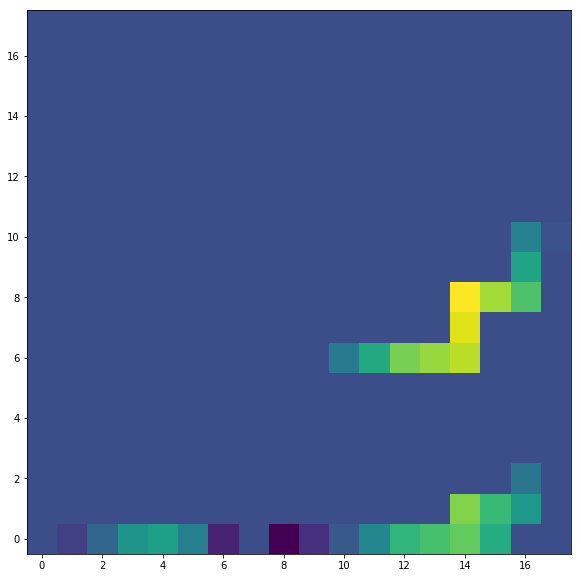

In [18]:
tot = nullx + nully
plt.figure(figsize=(20, 10))
plt.imshow(tot, origin='lower')
plt.show()

Next is "NR_distance_list", which holds the unique distances of each NRP. Note that distances itself can repeat, since the NRP also have to differ in vector orientation in order to be non-redundant.

In [19]:
nrp_dist = np.loadtxt('NR_distance_list.txt')
print(nrp_dist)
print('Number of NRP:', nrp_dist.shape[0])

[  1.77   5.31   7.08   5.31   1.77   1.77   5.31   7.08  12.38  12.38
  15.92  12.38  12.38   7.08  15.92  12.38  12.38  15.92  21.23  23.    28.3
  23.    21.23  23.    28.3   23.    21.23  23.    28.3   23.  ]
Number of NRP: 30


Next is our list of NRPs themselves, which has the form [NRP number, seg1, seg2]. Note that the **numbering of the NRP in principle starts at 1!** But we don't have any actual labels for the NRPs, so when we index this array, the numbering starts at 0 because that's how Python works. **The segment numbering starts at 1 too!!!** Except for the cases where we index them... you get my point.

In [20]:
nrp_list = np.loadtxt('NR_pairs_list.txt', dtype='int')
print(nrp_list)

[[ 1  2]
 [ 1  3]
 [ 1  4]
 [ 1  5]
 [ 1  6]
 [ 1  7]
 [ 1  9]
 [ 1 10]
 [ 1 11]
 [ 1 12]
 [ 1 13]
 [ 1 14]
 [ 1 15]
 [ 1 16]
 [ 2 15]
 [ 2 16]
 [ 2 17]
 [ 3 17]
 [ 7 11]
 [ 7 12]
 [ 7 13]
 [ 7 14]
 [ 7 15]
 [ 8 15]
 [ 9 15]
 [ 9 16]
 [ 9 17]
 [10 17]
 [11 17]
 [11 18]]


Next we have "vec_list2_x" and "vec_list2_y" which are actually useless, as explained in the script we're following here. So I'll skip these.

The final and most important one is the projection matrix. It holds the infromation about which NRP each segment pair corresponds to and has the shape: [nb_seg, nb_seg, 3].
First plane: Projection_Matrix[i,j,0] = n means that the segment pair formed by the segments #i and #j is equivalent to the pair #n of the non-redundant-pair basis (n = 1, 2, ...). Second and third planes: Projection_Matrix[i,j,1] = m and Projection_Matrix[i,j,2] = n means that the segment pair formed by the segments #i and #j is equivalent to the non-redundant pair formed by the segments #m and #n. Only the FIRST plane is useful for later (Projection_Matrix[:, :, 0]).

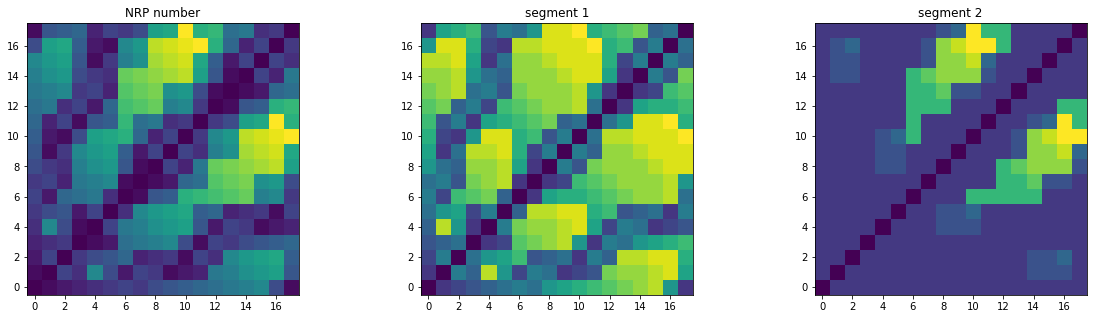

In [21]:
# Load the projection matrix
m = fits.getdata('Projection_Matrix.fits')

plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.imshow(m[:,:,0], origin='lower')
plt.title('NRP number')
plt.subplot(1, 3, 2)
plt.imshow(m[:,:,1], origin='lower')
plt.title('segment 1')
plt.subplot(1, 3, 3)
plt.imshow(m[:,:,2], origin='lower')
plt.title('segment 2')
plt.show()

The display of these also only makes sense if you can get the image values by hovering over them. And then you can do a couple of things:
- Compare the print of "nrp_list" with the plot labelled "NRP number"; the first line of nrp_list is NRP number 0, and it is composed by segments 1 and 2. So, in the image, at location 0 and 1 (remember that I was to lazy to change the matplotlib displays to the actual numbering of our segments), the image value should be 0, and so on
- Check some other values in the image, and by comparison with the aperture image, check if the numbers in there make sense.

One thing that you want to keep in mind is that when we talk about NRPs and segments, **their numbering starts at 1!!!** Did I get my point across yet? It is only because of the Python indexing that we *address* them by starting at zero.

I am so insistent on this because this has caused us quite some trouble in the generation of the projection matrix.

<h3>Why don't we just start numbering at 0?</h3>

<h5>In the case of the segments</h5>
we attribute segment number 0 to the very central segment which is traditinally blocked out by a central obscuration (secondary mirror). This does not have to be the case on every telescope though, so be careful with this.

<h5> In the case of the non-redundant pairs</h5>
Check out what the projection matrix actually means. It's second and third layer just duplicate information we already know, so let's ignore them and focus on the first layer, which can be displayed as a simple matrix, instead.

We have a matrix $m_{i, j}$ where $i, j = 1, 2, ..., nb_{seg}$. This means that this matrix displays all the possible segment pairs in our aperture, e.g. $seg 1 + seg 2$, $seg 1 + seg 3$, $seg 4 + 15$ and so on. There are two different things we have to keep in mind:

- Segment pairs with themselves are valid pairs:
This means that the combinations of $seg1 + seg1$, $seg2 + seg2$ and so on are totally valid and displayed in the matrix as well - we can find those on the main matrix diagonal.
- The "direction" of the segment pair counts too: Meaning, making the pairs $seg3 + seg7$ and $seg7 + seg3$ is *not* equivalent (think of the sign difference when calculating their distance!), but they will only be different by sign, which means that the matrix will be symmetric.
- A Pair of a segment with itself does **not count as a NRP!**: This is an important one that screwed me over when I wrote the part that generates the matrix. We basically want to ignore the matrix diagonal, in which we have all the pairs of the segments with themselves, so we have to fill those with zeros. **This is the reason why we can't number the NRPs starting at zero!**